In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)


In [2]:
# Define integer encoding for the 6 classes:
activity_to_code = {'dws': 0, 'ups': 1, 'sit': 2, 'std': 3, 'wlk': 4, 'jog': 5}
code_to_activity = {v:k for k,v in activity_to_code.items()}

In [3]:
df = pd.read_csv(r'../processed_data_100_25.csv')
# df = pd.read_csv(r'../processed_data_100_50.csv')
# df = pd.read_csv(r'../processed_data_200_50.csv')
# df = pd.read_csv(r'../processed_data_200_100.csv')
# df = pd.read_csv(r'../processed_data_300_75.csv')
# df = pd.read_csv(r'../processed_data_300_150.csv')

df = df.drop(columns = ['index_range', 'subject', 'experiment'])

df = df.replace(activity_to_code)

#   Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,attitude.roll_min,attitude.roll_max,attitude.roll_median,attitude.roll_std,attitude.roll_skew,attitude.pitch_min,attitude.pitch_max,attitude.pitch_median,attitude.pitch_std,attitude.pitch_skew,attitude.yaw_min,attitude.yaw_max,attitude.yaw_median,attitude.yaw_std,attitude.yaw_skew,gravity.x_min,gravity.x_max,gravity.x_median,gravity.x_std,gravity.x_skew,gravity.y_min,gravity.y_max,gravity.y_median,gravity.y_std,gravity.y_skew,gravity.z_min,gravity.z_max,gravity.z_median,gravity.z_std,gravity.z_skew,rotationRate.x_min,rotationRate.x_max,rotationRate.x_median,rotationRate.x_std,rotationRate.x_skew,rotationRate.y_min,rotationRate.y_max,rotationRate.y_median,rotationRate.y_std,rotationRate.y_skew,rotationRate.z_min,rotationRate.z_max,rotationRate.z_median,rotationRate.z_std,rotationRate.z_skew,userAcceleration.x_min,userAcceleration.x_max,userAcceleration.x_median,userAcceleration.x_std,userAcceleration.x_skew,userAcceleration.y_min,userAcceleration.y_max,userAcceleration.y_median,userAcceleration.y_std,userAcceleration.y_skew,userAcceleration.z_min,userAcceleration.z_max,userAcceleration.z_median,userAcceleration.z_std,userAcceleration.z_skew,attitude.roll_max_amp,attitude.roll_main_freq,attitude.roll_num_freq,attitude.pitch_max_amp,attitude.pitch_main_freq,attitude.pitch_num_freq,attitude.yaw_max_amp,attitude.yaw_main_freq,attitude.yaw_num_freq,gravity.x_max_amp,gravity.x_main_freq,gravity.x_num_freq,gravity.y_max_amp,gravity.y_main_freq,gravity.y_num_freq,gravity.z_max_amp,gravity.z_main_freq,gravity.z_num_freq,rotationRate.x_max_amp,rotationRate.x_main_freq,rotationRate.x_num_freq,rotationRate.y_max_amp,rotationRate.y_main_freq,rotationRate.y_num_freq,rotationRate.z_max_amp,rotationRate.z_main_freq,rotationRate.z_num_freq,userAcceleration.x_max_amp,userAcceleration.x_main_freq,userAcceleration.x_num_freq,userAcceleration.y_max_amp,userAcceleration.y_main_freq,userAcceleration.y_num_freq,userAcceleration.z_max_amp,userAcceleration.z_main_freq,userAcceleration.z_num_freq,activity
0,-0.645772,0.646407,0.091014,4.701708e-01,-0.125577,-0.096391,0.096486,0.013585,0.070180,-0.125577,0.069803,0.530164,0.336652,0.141497,-0.289585,-0.044645,0.044689,0.006292,3.250507e-02,-0.125577,0.926288,0.926288,0.926288,2.773875e-16,0.0,-0.155008,0.154938,-0.020142,1.063420e-01,0.147945,-1.378641,1.399746,0.210302,0.980982,-0.154590,-1.104590,1.098333,-0.149026,0.744246,0.139976,-0.386348,0.637843,0.203659,0.348300,-0.185476,-0.144436,0.000741,-0.081593,0.049042,0.139066,0.092384,0.092384,0.092384,3.464537e-17,0.000000,0.175164,0.175164,0.175164,6.324325e-17,0.000000,28.191973,4,50,4.208072,4,50,32.010590,0,50,1.949041,4,50,92.628781,0,59,6.759340,3,50,12.077331,1,47,49.228972,3,66,17.013596,0,43,3.129584,3,50,9.238443,0,53,17.516434,0,53,4
1,0.660591,0.660591,0.660591,0.000000e+00,0.000000,-0.094034,-0.093733,-0.093963,0.000091,0.691372,-0.021923,-0.021847,-0.021905,0.000023,0.691353,0.529821,0.529821,0.529821,1.115816e-16,0.000000,0.500953,0.500953,0.500953,1.115816e-16,0.0,-0.000140,0.003855,0.001962,1.179463e-03,-0.073129,-0.014032,0.019181,0.001389,0.009476,0.111117,-0.014991,0.017975,-0.001997,0.009021,0.379271,-0.019989,0.007886,-0.005685,0.008246,-0.192617,-0.010098,-0.009333,-0.009720,0.000224,0.014980,0.017738,0.017738,0.017738,0.000000e+00,0.000000,0.005097,0.005097,0.005097,1.743463e-18,0.000000,66.059124,0,1,0.001810,1,50,0.000453,1,50,52.982083,0,1,50.095316,0,1,0.192644,0,50,0.278247,0,51,0.498724,2,49,0.360521,3,50,0.012300,2,49,1.773792,0,1,0.509674,0,1,2
2,1.424544,1.424544,1.424544,6.694897e-16,0.000000,-0.018719,0.294081,0.135338,0.107155,0.011087,-0.239379,0.129518,-0.041425,0.112466,-0.082183,0.667170,0.667170,0.667170,2.231632e-16,0.000000,0.666448,0.666448,0.666448,0.000000e+00,0.0,-0.034317,0.033931,0.000284,2.390419e-02,-0.010559,-0.665500,0.665226,0.007839,0.471640,-0.009551,-0.737263,0.754401,0.002117,0.380407,-0.004055,-0.817068,0.816731,0.009625,0.579057,-0.009551,-0.208410,0.279299,-0.027748,0.145361,0.453964,0.115651

In [4]:
label = df.pop('activity').to_numpy()
data = df.to_numpy()

skf = StratifiedKFold(5)

In [5]:
print(data.shape)
print(label.shape)

(55247, 96)
(55247,)


In [6]:
accuracies = []
matrixes = []
attempt = 1

for train_index, test_index in skf.split(data, label):
    print("TRAIN ATTEMPT: ", attempt)
    attempt = attempt + 1
    
    train, train_label = data[train_index], label[train_index]
    test, test_label = data[test_index], label[test_index]
    
    clf = svm.SVC(kernel='rbf')
    clf.fit(train, train_label)

    predict_label = clf.predict(test)
    
    acc = accuracy_score(test_label, predict_label)
    print("ACCURACY: ", acc)
    accuracies.append(acc)
    
    matrix = confusion_matrix(test_label, predict_label)
    matrixes.append(matrix)

accuracies = np.around(accuracies, decimals = 4)
print("Accuracy values: ", accuracies)
print("Average accuracy: ", np.mean(accuracies))

TRAIN ATTEMPT:  1
ACCURACY:  0.9703167420814479
TRAIN ATTEMPT:  2
ACCURACY:  0.9735746606334842
TRAIN ATTEMPT:  3
ACCURACY:  0.972214680061544
TRAIN ATTEMPT:  4
ACCURACY:  0.9710381029957462
TRAIN ATTEMPT:  5
ACCURACY:  0.9673273599420762
Accuracy values:  [0.9703 0.9736 0.9722 0.971  0.9673]
Average accuracy:  0.97088


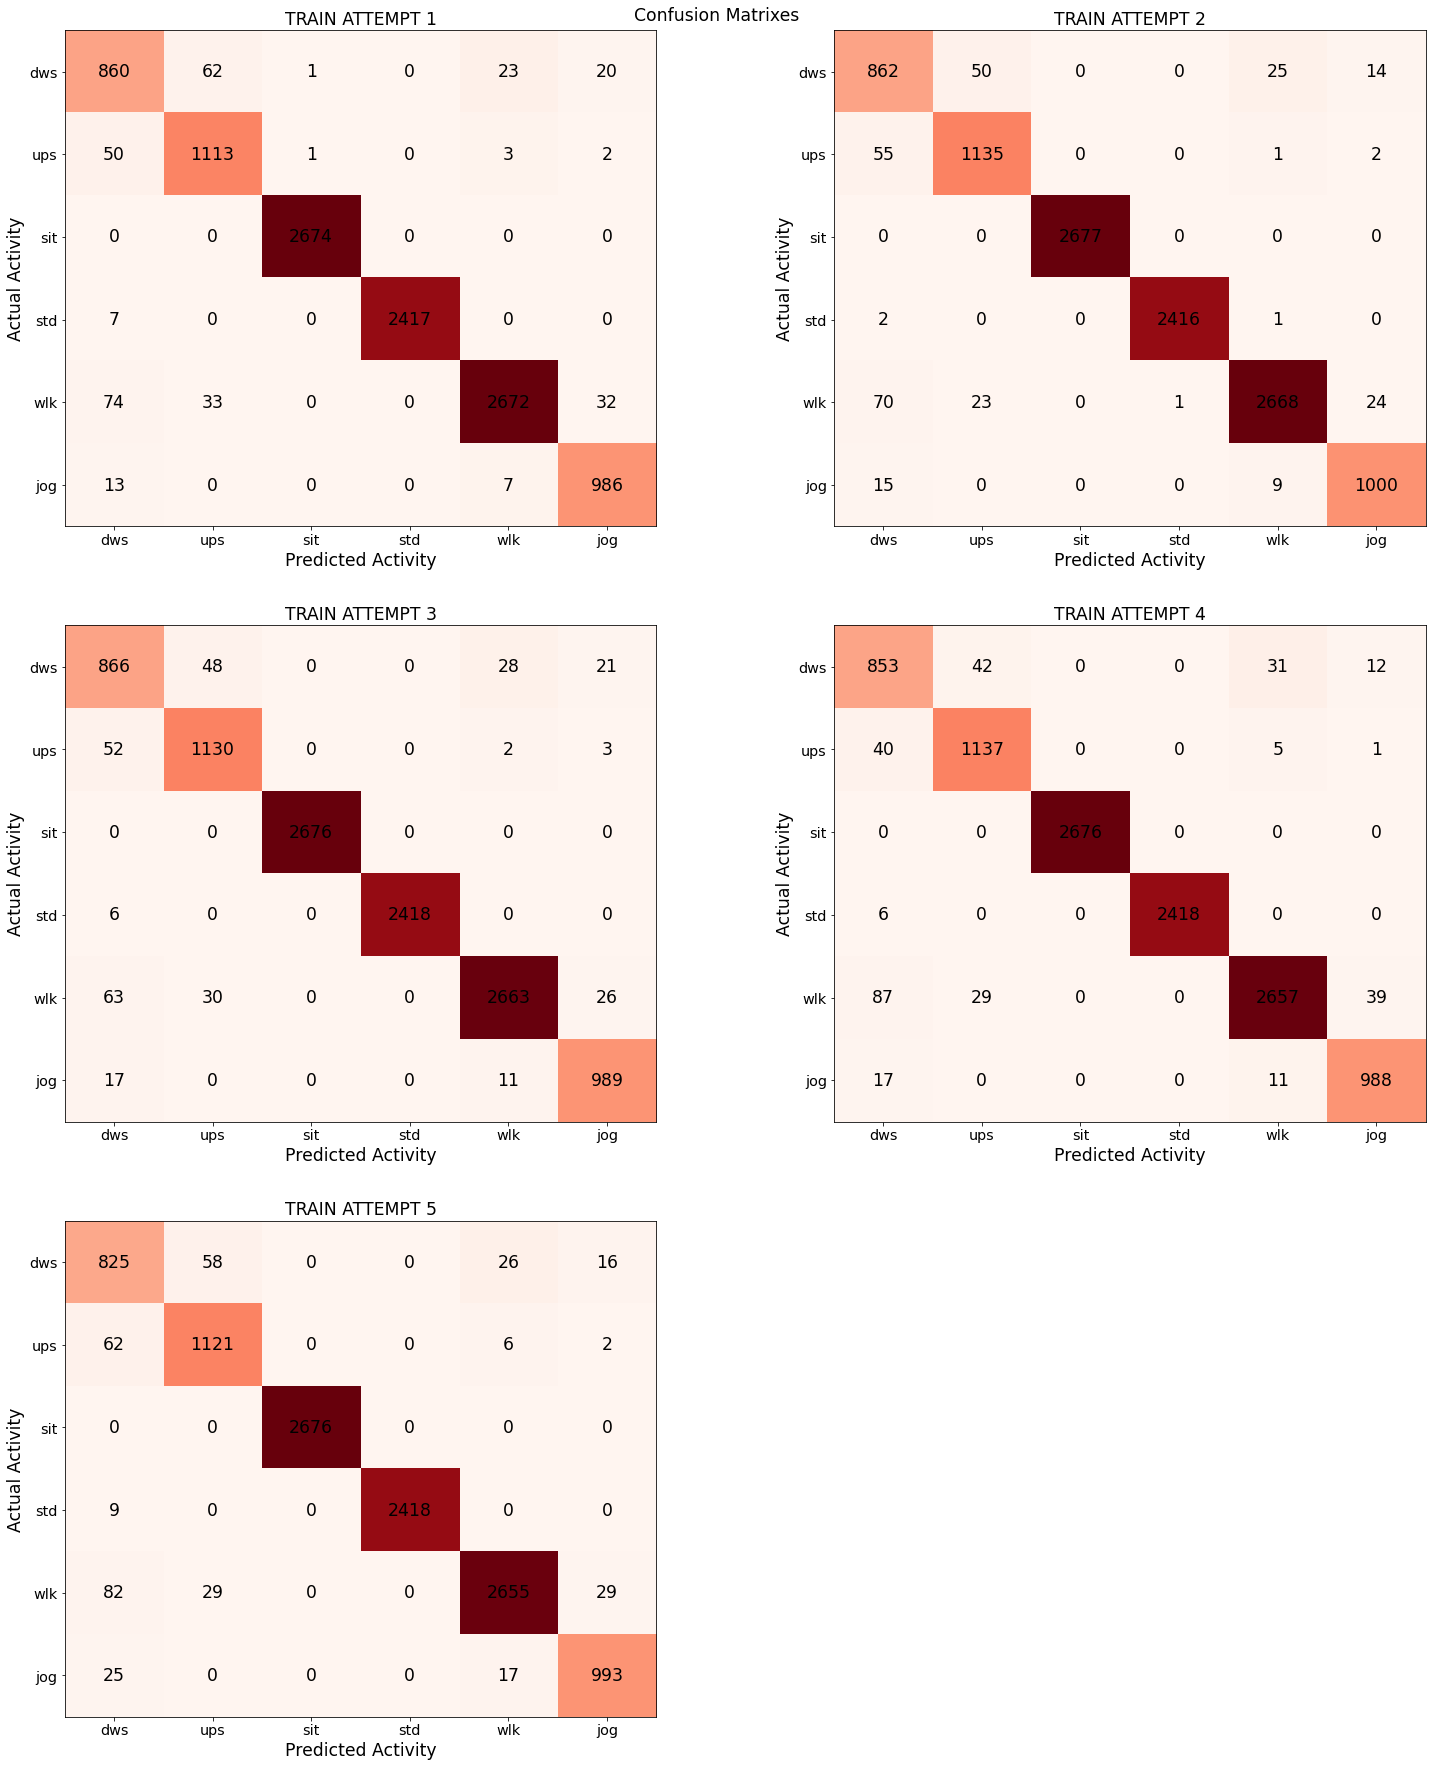

In [7]:
activities = ['dws', 'dws', 'ups', 'sit', 'std', 'wlk', 'jog']

fig = plt.figure(figsize = (20,25))
fig.suptitle("Confusion Matrixes", fontsize = "xx-large")

for index, m in enumerate(matrixes):
    sp = fig.add_subplot(3,2,index + 1)
    sp.imshow(m, cmap="Reds", aspect='auto')
    sp.set_title("TRAIN ATTEMPT " + str(index + 1), fontsize = "xx-large")

    for i in range(6):
        for j in range(6):
            sp.text(i, j, m[i, j], ha="center", va="center", color="black", fontsize = "xx-large")

    sp.set_xticklabels(activities, fontsize = "x-large")
    sp.set_yticklabels(activities, fontsize = "x-large")
    
    sp.set_ylabel("Actual Activity", fontsize = "xx-large")
    sp.set_xlabel("Predicted Activity", fontsize = "xx-large")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.3, hspace = 0.2)
plt.show()